# Lab 4

In [1]:
import random
import time 
import matplotlib.pyplot as plt

### Part 1.1

In [2]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        y = self.left
        self.left = y.right
        if y.right is not None:
            y.right.parent = self

        y.parent = self.parent
        if self.parent is not None:
            if self.is_right_child():
                self.parent.right = y
            else:
                self.parent.left = y

        y.right = self
        self.parent = y


    def rotate_left(self):
        y = self.right
        self.right = y.left
        if y.left is not None:
            y.left.parent = self

        y.parent = self.parent
        if self.parent is not None:
            if self.is_left_child():
                self.parent.left = y
            else:
                self.parent.right = y

        y.left = self
        self.parent = y


In [3]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right is None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        while node.parent is not None and node.parent.is_red():
            if node.parent.is_left_child():
                uncle = node.get_uncle()
                if uncle is not None and uncle.is_red():
                    node.parent.make_black()
                    uncle.make_black()
                    node.parent.parent.make_red()
                    node = node.parent.parent
                else:
                    if node.is_right_child():
                        node = node.parent
                        node.rotate_left()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node.parent.parent.rotate_right()
            else:
                uncle = node.get_uncle()
                if uncle is not None and uncle.is_red():
                    node.parent.make_black()
                    uncle.make_black()
                    node.parent.parent.make_red()
                    node = node.parent.parent
                else:
                    if node.is_left_child():
                        node = node.parent
                        node.rotate_right()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node.parent.parent.rotate_left()

        self.root.make_black()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"



In [5]:

tree = RBTree()

# Insert some values (Feel free to modify and extend)
tree.insert(7)
tree.insert(3)
tree.insert(18)
tree.insert(10)
tree.insert(8) 
tree.insert(22)
tree.insert(11)

# Print the tree for visual inspection
print(tree)
print(tree.get_height())

[[[(3,B)] <- (7,B) -> [[(8,B)] <- (10,R) -> [[(11,R)] <- (18,B) -> [(22,R)]]]]]
4


## Part 1.2

In [6]:
class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None
    
    def is_empty(self):
        return self.root is None
    
    def get_height(self):
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node is None:
            return 0
        else:
            left_height = self.__get_height(node.left)
            right_height = self.__get_height(node.right)
            return 1 + max(left_height, right_height)

    def insert(self, value):
        if self.root is None:
            self.root = BSTNode(value)
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = BSTNode(value)
            else:
                self.__insert(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = BSTNode(value)
            else:
                self.__insert(node.right, value)

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node is None:
            return ""
        if node.left is None and node.right is None:
            return "[" + str(node.value) + "]"
        if node.left is None:
            return "[" + str(node.value) + " -> " + self.__str_helper(node.right) + "]"
        if node.right is None:
            return "[" + self.__str_helper(node.left) + " <- " + str(node.value) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node.value) + " -> " + self.__str_helper(node.right) + "]"


In [7]:
tree = BST()

# Insert some values (Feel free to modify and extend)
tree.insert(7)
tree.insert(3)
tree.insert(18)
tree.insert(10)
tree.insert(8) 
tree.insert(22)
tree.insert(11)

# Print the tree for visual inspection
print(tree)

[[[3] <- 7 -> [[[8] <- 10 -> [11]] <- 18 -> [22]]]]


Average height difference between RBT and BST (RBT - BST): -16.23


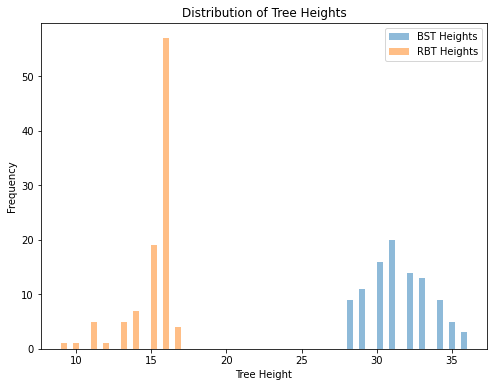

In [8]:
def experiment(rounds):
    bst_heights = []
    rbt_heights = []

    for _ in range(rounds):
        random_list = [random.randint(1, 100000) for _ in range(10000)]
        bst = BST()
        rbt = RBTree()
        for n in random_list:
            bst.insert(n)
            rbt.insert(n)

        bst_height = bst.get_height()
        rbt_height = rbt.get_height()

        bst_heights.append(bst_height)
        rbt_heights.append(rbt_height)

    return bst_heights, rbt_heights

rounds = 100
bst_heights, rbt_heights = experiment(rounds)

result = 0

for i in range(rounds):
    height_difference = rbt_heights[i] - bst_heights[i]
    
    result += height_difference

avg = result / rounds

print("Average height difference between RBT and BST (RBT - BST):", avg)

plt.figure(figsize=(8, 6))
plt.hist(bst_heights, bins=20, alpha=0.5, label='BST Heights')
plt.hist(rbt_heights, bins=20, alpha=0.5, label='RBT Heights')
plt.xlabel('Tree Height')
plt.ylabel('Frequency')
plt.title('Distribution of Tree Heights')
plt.legend()
plt.show()

The experiment calculates the average height difference of RBT and BST on the same list. 
Since my experiment is displays the average of (height of RBT)- (height of BST), if the average is positive, it means the height of RBT is larger than BST. This implies RBT is less balanced which results the slower operation than BST. Conversely, when the average is negative, it shows the RBT operation is faster on the given list compared to BST.

The graph shows the distribution of the height on multiple runs. The number of runs can be chosen using the variable 'rounds'.

In my experiment, I have ran 100 times, and the average height difference came out was negative, always around -16. This shows that for the data set generated randomly in the length of 10000, RBT is more balanced compared to BST. Also, looking at the graph, we can check the RBT heights are always on the left side, while the BST heights are always on the right side, showing the height of RBT is smaller.
This difference is important because it determines the speed of the operation.
So by leveraging the average height difference, we can choose which tree to use between RBT and BST by checking which tree is more balanced, which results in the speed of the operation. We can see which tree works faster on the dataset to work with.

## Part 1.3

In [9]:
def unsortedList(length):
    return [random.randint(1, 100000) for _ in range(length)]

def perfectlySortedList(length):
    unsorted_list = unsortedList(length)
    sorted_list = sorted(unsorted_list)
    return sorted_list

def controlled_quicksort(arr, left, right, max_swaps):
    if left < right:
        if max_swaps <= 0:
            return
        pivot_index = partition(arr, left, right)
        controlled_quicksort(arr, left, pivot_index - 1, max_swaps - (right - left))
        controlled_quicksort(arr, pivot_index + 1, right, max_swaps - (right - pivot_index - 1))

def partition(arr, left, right):
    pivot = arr[right]
    i = left - 1
    for j in range(left, right):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[right] = arr[right], arr[i + 1]
    return i + 1

def nearSortedList(length, max_swaps):
    near_sorted_list = unsortedList(length)
    controlled_quicksort(near_sorted_list, 0, length - 1, max_swaps)
    return near_sorted_list

# Function to record height difference between BST and RBT
def experiment(list_length, rounds, max_swaps):
    us_bst_heights = []
    us_rbt_heights = []
    ps_bst_heights = []
    ps_rbt_heights = []
    ns_bst_heights = []
    ns_rbt_heights = []

    for _ in range(rounds):

        unsorted_list = unsortedList(list_length)
        bst = BST()
        rbt = RBTree()
        for n in unsorted_list:
            bst.insert(n)
            rbt.insert(n)
        us_bst_height = bst.get_height()
        us_rbt_height = rbt.get_height()
        us_bst_heights.append(us_bst_height)
        us_rbt_heights.append(us_rbt_height)

        sorted_list = perfectlySortedList(list_length)
        bst = BST()
        rbt = RBTree()
        for n in sorted_list:
            bst.insert(n)
            rbt.insert(n)
        ps_bst_height = bst.get_height()
        ps_rbt_height = rbt.get_height()
        ps_bst_heights.append(ps_bst_height)
        ps_rbt_heights.append(ps_rbt_height)

        near_sorted_list = nearSortedList(list_length,max_swaps)

        bst = BST()
        rbt = RBTree()
        for n in near_sorted_list:
            bst.insert(n)
            rbt.insert(n)
        ns_bst_height = bst.get_height()
        ns_rbt_height = rbt.get_height()
        ns_bst_heights.append(ns_bst_height)
        ns_rbt_heights.append(ns_rbt_height)

    return ps_bst_heights, ps_rbt_heights, ns_bst_heights, ns_rbt_heights, us_bst_heights, us_rbt_heights

list_length = 1000
rounds = 100
max_swaps = 500


ps_bst_heights, ps_rbt_heights, ns_bst_heights, ns_rbt_heights, us_bst_heights, us_rbt_heights = experiment(list_length,rounds,max_swaps)

ps_result,ns_result,us_result = 0,0,0

for i in range(rounds):
    ps_height_difference = ps_rbt_heights[i] - ps_bst_heights[i]
    
    ps_result += ps_height_difference

    ns_height_difference = ns_rbt_heights[i] - ns_bst_heights[i]
    
    ns_result += ns_height_difference

    us_height_difference = us_rbt_heights[i] - us_bst_heights[i]
    
    us_result += us_height_difference

ps_avg = ps_result / rounds
ns_avg = ns_result / rounds
us_avg = us_result / rounds
      
print("Average height difference between RBT and BST (RBT - BST) when the list is perfectly sorted:", ps_avg)
print("Average height difference between RBT and BST (RBT - BST) when the list is near-sorted:", ns_avg)
print("Average height difference between RBT and BST (RBT - BST) when the list is unsorted:", us_avg)

Average height difference between RBT and BST (RBT - BST) when the list is perfectly sorted: -993.21
Average height difference between RBT and BST (RBT - BST) when the list is near-sorted: -30.85
Average height difference between RBT and BST (RBT - BST) when the list is unsorted: -11.08


My experiment generates three lists(perfectly sorted, near sorted, unsorted) with the same element of the length determined by the variable 'list_length'. The number of runs can be chosen by the variable 'rounds'. The variable 'max-swap' is used to define the degree of sortedness of the near sorted list, where you can choose the number of swaps that will be executed on the unsorted list. Near sorted lists are generated using the controlled quick sort.

My experiment displays the average of (height of RBT)- (height of BST) on each three types of lists. Like explained in 1.2, if the average is positive, it means the height of RBT is larger than BST. This implies RBT is less balanced which results the slower operation than BST. Conversely, when the average is negative, it shows the RBT operation is faster on the given list compared to BST. 

In my experiment, I have ran 100 times with the list length of 1000 with max_swaps=500, which kind of generates half-sorted list. The code exceeded the maximum depth of recursion when I have ran with the list length of 10000.
All the average height difference on the three types of lists came out negative. The sorted list showed the significantly largest absolute value, near-sorted list coming next, and the unsorted list showed the least absolute value. This shows that the more dataset is sorted, the faster RBT would be operated on the dataset compared when using BST.

The height difference between RBTs and BSTs is largest for perfectly sorted lists and smallest for unsorted lists due to the insertion operations in both trees. When inserting elements of sorted list into BST, each new element will be inserted as the right child of the previous element. Therefore, this will result in the tree height equal to the length of the list. However, for the RBT, since it has self-balancing properties, it leads to smaller height than BST. When inserting elements of unsorted list, the randomness of insertion order distributes the node more evenly on both trees, resulting in a smaller height difference.


# Part 2.1

In [113]:
import math

class MultiSortedArrays:
    def __init__(self):
        self.k = 0
        self.arrays = []

    def calculate_k(self, n):
        self.k = math.ceil(math.log2(n + 1))
        self.arrays = [[] for _ in range(self.k)]

    def get_array_index(self, x):
        for i in range(self.k - 1, -1, -1):
            if x >> i & 1:
                return i
        return None

    def insert_in_order(self, element, array):
        low = 0
        high = len(array) - 1
        while low <= high:
            mid = (low + high) // 2
            if array[mid] is None or array[mid] > element:
                high = mid - 1
            else:
                low = mid + 1
        array.insert(low, element)

    def insert(self, x):
        if not self.arrays:
            self.calculate_k(1)
        
        array_index = self.get_array_index(x)
        if array_index is None:
            self.arrays[0].insert(0, x)
        else: 
            self.insert_in_order(x, self.arrays[array_index]) 

        current_n = sum(len(arr) for arr in self.arrays)
        if current_n + 1 > len(self.arrays) * 2:
            self.redistribute(current_n + 1)

    def delete(self, x):
        array_index = self.get_array_index(x)
        if array_index is not None:
            try:
                self.arrays[array_index].remove(x)
            except ValueError:
                pass 
        current_n = sum(len(arr) for arr in self.arrays)
        if current_n < len(self.arrays) // 2:  
            self.redistribute(current_n)

    def search(self, x):
        array_index = self.get_array_index(x)
        if array_index is not None:
            index = self.binary_search(x, self.arrays[array_index])
            return index is not None
        return False

    def redistribute(self, n):
        new_k = math.ceil(math.log2(n + 1)) 
        new_arrays = [[] for _ in range(new_k)]

        for arr in self.arrays:
            for element in arr:
                array_index = self.get_array_index(element)
                if array_index is not None:
                    new_arrays[array_index].append(element)  
                else: 
                    new_arrays[0].append(element)

        self.k = new_k
        self.arrays = new_arrays


    def binary_search(self, element, array):
        low = 0
        high = len(array) - 1
        while low <= high:
            mid = (low + high) // 2
            if array[mid] is None:
                return None
            elif array[mid] == element:
                return mid
            elif array[mid] > element:
                high = mid - 1
            else:
                low = mid + 1
        return None 


In [114]:
data_structure = MultiSortedArrays()

xs = [1,2,3,4,5,6,7,8]
for i in range(0,30,2):
    data_structure.insert(i+1)
    data_structure.insert(i)
    

print(data_structure.arrays)


print(data_structure.search(182))
#[[1, 5, 7, 9], [2, 6, 10], [4], [8], [], [], []]

[[0, 1], [2, 3], [4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
False


## 2.2


In [115]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np


def ds_implementation(ds,xs,s):
    return ds.search(s)

def binary_search_1(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    while lower <= upper:
        mid = (lower + upper) // 2
        if item_list[mid] == to_find:
            return mid  
        elif item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid - 1
    return -1  

def binary_search_2(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    while lower <= upper:
        mid = (lower + upper) // 2
        if item_list[mid] == to_find:
            return mid
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid - 1
    return -1

def binary_search_3(item_list, to_find):
    left = 0
    right = len(item_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if item_list[mid] == to_find:
            return mid
        elif item_list[mid] < to_find:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def binary_search_4(item_list, to_find,lower,upper):

    if lower > upper:
        return False

    mid = (lower + upper) // 2

    if item_list[mid] == to_find:
        return True
    elif item_list[mid] < to_find:
        return binary_search_4(item_list, to_find, mid + 1, upper)
    else:
        return binary_search_4(item_list, to_find, lower, mid - 1)

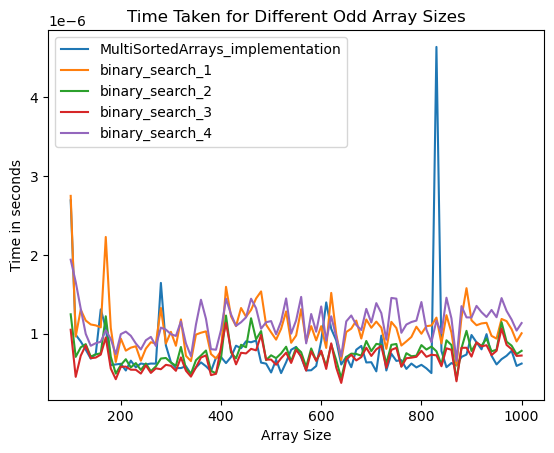

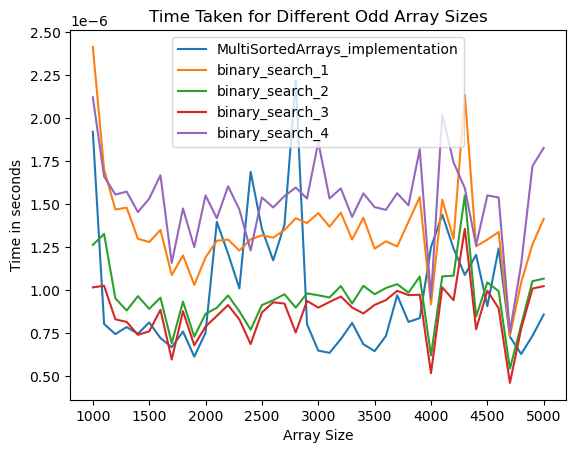

In [118]:
def generateOdd(n):
    if n % 2 == 0:
        n += 1
    return sorted(random.sample(range(1, n+5), n))

def measure_time(func, *args):
    start_time = timeit.default_timer()
    result = func(*args)
    end_time = timeit.default_timer()
    return end_time - start_time

def plot_times(smallest_size, largest_size, increment):
    sizes = range(smallest_size,largest_size +1 , increment)  # Array sizes from 10 to 100
    ds_times = []
    binary_search_1_times = []
    binary_search_2_times = []
    binary_search_3_times = []
    binary_search_4_times = []
    
    for size in sizes:
        xs = generateOdd(size)
        s = random.choice(xs)
        
        ds_time = measure_time(ds_implementation, MultiSortedArrays(), xs, s)
        binary_search_1_time = measure_time(binary_search_1, xs, s)
        binary_search_2_time = measure_time(binary_search_2, xs, s)
        binary_search_3_time = measure_time(binary_search_3, xs, s)
        binary_search_4_time = measure_time(binary_search_4, xs, s, 0, len(xs) - 1)
        
        ds_times.append(ds_time)
        binary_search_1_times.append(binary_search_1_time)
        binary_search_2_times.append(binary_search_2_time)
        binary_search_3_times.append(binary_search_3_time)
        binary_search_4_times.append(binary_search_4_time)

    plt.plot(sizes, ds_times, label='MultiSortedArrays_implementation')
    plt.plot(sizes, binary_search_1_times, label='binary_search_1')
    plt.plot(sizes, binary_search_2_times, label='binary_search_2')
    plt.plot(sizes, binary_search_3_times, label='binary_search_3')
    plt.plot(sizes, binary_search_4_times, label='binary_search_4')
    plt.xlabel('Array Size')
    plt.ylabel('Time in seconds')
    plt.title('Time Taken for Different Odd Array Sizes')
    plt.legend()
    plt.show()

plot_times(100,1000,10)
plot_times(1000,5000,100)




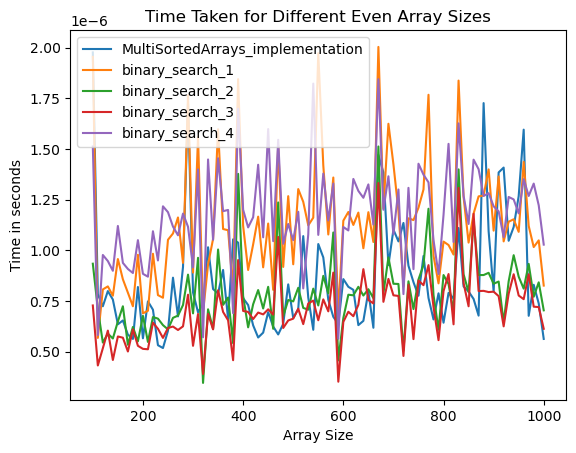

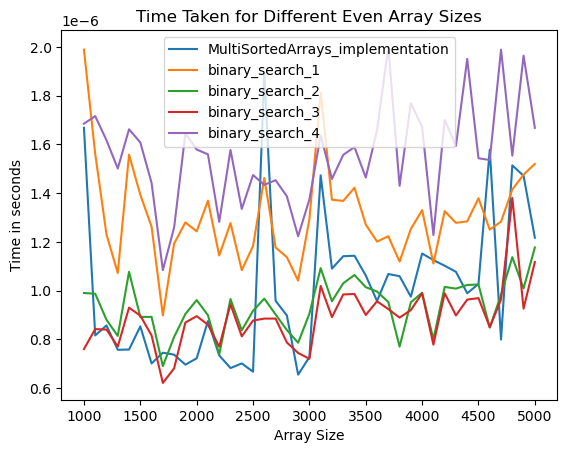

In [119]:
def generateEven(n):
    if n % 2 == 1:
        n += 1
    return sorted(random.sample(range(1, n+5), n))

def measure_time(func, *args):
    start_time = timeit.default_timer()
    result = func(*args)
    end_time = timeit.default_timer()
    return end_time - start_time

def plot_times(smallest_size, largest_size, increment):
    sizes = range(smallest_size,largest_size +1 , increment)  # Array sizes from 10 to 100
    ds_times = []
    binary_search_1_times = []
    binary_search_2_times = []
    binary_search_3_times = []
    binary_search_4_times = []
    
    for size in sizes:
        xs = generateOdd(size)
        s = random.choice(xs)
        
        ds_time = measure_time(ds_implementation, MultiSortedArrays(), xs, s)
        binary_search_1_time = measure_time(binary_search_1, xs, s)
        binary_search_2_time = measure_time(binary_search_2, xs, s)
        binary_search_3_time = measure_time(binary_search_3, xs, s)
        binary_search_4_time = measure_time(binary_search_4, xs, s, 0, len(xs) - 1)
        
        ds_times.append(ds_time)
        binary_search_1_times.append(binary_search_1_time)
        binary_search_2_times.append(binary_search_2_time)
        binary_search_3_times.append(binary_search_3_time)
        binary_search_4_times.append(binary_search_4_time)

    plt.plot(sizes, ds_times, label='MultiSortedArrays_implementation')
    plt.plot(sizes, binary_search_1_times, label='binary_search_1')
    plt.plot(sizes, binary_search_2_times, label='binary_search_2')
    plt.plot(sizes, binary_search_3_times, label='binary_search_3')
    plt.plot(sizes, binary_search_4_times, label='binary_search_4')
    plt.xlabel('Array Size')
    plt.ylabel('Time in seconds')
    plt.title('Time Taken for Different Even Array Sizes')
    plt.legend()
    plt.show()

plot_times(100,1000,10)
plot_times(1000,5000,100)

The experiment shows the time taken by the MultiSortedArrays implemention compared to the 4 different binary search implemention from lab 2. The experiement shows the results for different sizes of arrays of even and odd sizes. 

The first graph made with plot_times(10,1000,10) shows the time taken to make arrays of sizes 10 to 1000 by increments of 10. The results show that the MultiSortedArrays_implementation is evidently slower than the other implementions until the 100 mark. After the 100 array size mark, the MultiSortedArrays_implementation's time starts to come closer to being the fastest one. The second graph shows the results from array size 1000-5000 in increments of 100. It is evident here that MultiSortedArrays_implementation's times are not the slowest at many instaces and are relative to the fastest times provided by the other implementations. 

To explain these results we must understand how the MultiSortedArrays_implementation works. When the array size is small, the multisort is slow since it needs to redistribute elements between arrrays and resize arrays. That entire operation has a greater time complexity. However when the array size is larger the number of arrays of k also increaes that is more efficient as the number of elements per array decreases reducing the complexity of the operation. 

We saw that around array size 100, the implemention is optimal as it benefits for the reduced operations of having more arrays and fewer elements in those arrays. This is even more clear in the second graph as at times the implemention has the lowest time taken. It can be assumed that with a greater time the results would be more consistent in being optimal. 


In conlcusion, the MultiSortedArrays_implementation is ideal for greater array size as it can have more arrays with minimal elements within. This is consistent through odd sized arrays and even sized arrays. it is overkill when using on smaller sizes arrays (less than 500). 
